In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# 토치비전에 mnist데이터셋이 있음. 걔를 가져와서 사용함.
mnist_train = datasets.MNIST(root='minist_data',
                             train=True,
                             download=True,
                             transform=transforms.Compose([transforms.ToTensor()]))
mnist_test = datasets.MNIST(root='minist_data',
                             train=False,
                             download=True,
                             transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: minist_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: minist_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [4]:
print(mnist_train.data)
mnist_train.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
mnist_train.data[0]
mnist_train.targets[1]

tensor(0)

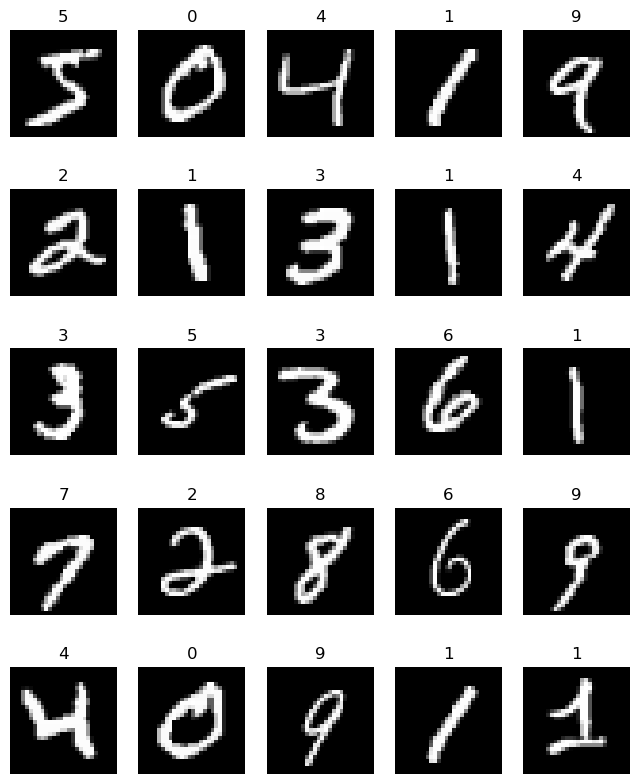

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def plot(x, y):
    plt.figure(figsize=(8,10))
    for i in range(len(x)):
        plt.subplot(5,5,i+1)
        img = (np.array(x[i], dtype='float')).reshape(28,28)
        plt.title(y[i].item())
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

plot(mnist_train.data[:25], mnist_train.targets[:25])

In [7]:
x = mnist_train.data.float()/255
y = mnist_train.targets
x = x.view(x.size(0), -1)  # 3차원 -> 2차원으로 변환
print(x.size())
input_size = x.size(-1)
print(input_size)
output_size = int(max(y))+1
print(output_size)

torch.Size([60000, 784])
784
10


In [8]:
ratio=[0.8,0.2]
train_cnt= int(x.size(0)*ratio[0]) # 60000*0.8
valid_cnt= int(x.size(0)*ratio[1]) # 60000*0.2
test_cnt = len(mnist_test)
print(train_cnt, valid_cnt, test_cnt )
cnts=[train_cnt, valid_cnt]
indices=torch.randperm(x.size(0))
print(indices)
x=torch.index_select(x, dim=0, index=indices)
y=torch.index_select(y, dim=-1, index=indices)
print(y[0])

48000 12000 10000
tensor([56533, 39298, 54127,  ..., 16505, 21892,  7642])
tensor(0)


In [9]:
x1=list(x.split(cnts, dim=0))
y1=list(y.split(cnts, dim=0))
print(len(x1), len(x1[0]), len(x1[1]))
print(len(y1), len(y1[0]), len(y1[1]))
print(x1[0].shape, x1[1].shape, y1[0].shape, y1[1].shape)
x1 += [(mnist_test.data.float()/255).view(test_cnt, -1)]
y1 += [mnist_test.targets]
print(x1[0].shape, x1[1].shape, x1[2].shape, y1[0].shape, y1[1].shape, y1[2].shape)

2 48000 12000
2 48000 12000
torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([48000]) torch.Size([12000])
torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([10000, 784]) torch.Size([48000]) torch.Size([12000]) torch.Size([10000])


In [10]:
model= nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.Linear(400,300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    # nn.LogSoftmax(dim=-1)  # Softmax가 디폴트라서 Softmax만 쓰려면 생략가능
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
)

In [11]:
# crit=nn.NLLLoss
crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
# Adam : lr을 자동 조절
# Adam을 쓰면 러닝레이트를 안써줘도 됨. (안 적으면 알아서 러닝레이트값을 조절함.)

epochs = 1001
batch_size = 256


In [12]:
from copy import deepcopy
epochs = 1001
batch_size=256

lowest_loss = np.inf
best_model = None
early_stop = 50
lowest_epoch=np.inf

In [13]:
train_history, valid_history=[],[]

for epoch in range(epochs):
    indices=torch.randperm(x1[0].size(0))
    x_ = torch.index_select(x1[0], dim=0, index=indices) # train_data_x : 훈련이미지
    y_ = torch.index_select(y1[0], dim=0, index=indices) # train_data_y : 훈련레이블
    x_ = x_.split(batch_size, dim=0) # 48000/256
    y_ = y_.split(batch_size, dim=0) 
    
    train_loss, valid_loss=0, 0
    y_hat=[]
    for x_i, y_i in zip(x_, y_):
        # print(x_i.size(), y_i.size())
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss +=float(loss)
    train_loss = train_loss/len(x_)

    with torch.no_grad():
        x_ = x1[1].split(batch_size, dim=0)
        y_ = y1[1].split(batch_size, dim=0)
        valid_loss=0
        for x_i, y_i in zip(x_, y_):   # 횟수 : 12000/256
            y_hat_i = model(x_i)
            loss=crit(y_hat_i, y_i.squeeze())
            valid_loss+=float(loss)

            y_hat +=[y_hat_i]
    valid_loss = valid_loss/len(x_)
    train_history +=[train_loss]
    valid_history +=[valid_loss]

    if epoch%10==0:
        print(epoch, train_loss, valid_loss)
    
    if valid_loss <= lowest_loss:
        lowest_loss =valid_loss
        lowest_epoch=epoch
        best_model=deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < epoch:
            print(f'{lowest_epoch}이후 epoch 증가하는 동안 손실함수 감소 없음')
            break
print(f'epoch {lowest_epoch}일때 손실함수 {lowest_loss}가 검정데이터로 가장 낮은 손실함수를 가짐.')

0 0.6064354666370027 0.23268457708206583
10 0.02133507834266911 0.09902911764034565
20 0.009467878267621037 0.12202286411156045
30 0.007121094209341731 0.11122480284501897
40 0.004315002385854004 0.15307480948878097
50 0.007014327340236397 0.1364166477021385
60 0.0047247369489110845 0.1375017287593553
16이후 epoch 증가하는 동안 손실함수 감소 없음
epoch 16일때 손실함수 0.09455828045673192가 검정데이터로 가장 낮은 손실함수를 가짐.


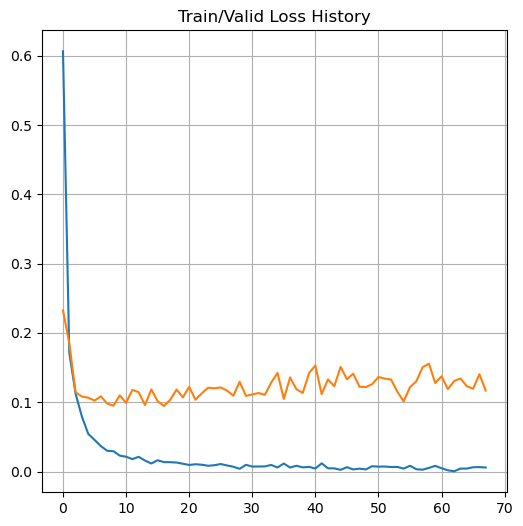

In [14]:
plot_from = 0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title("Train/Valid Loss History")
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], label="train loss")
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], label="Valid loss")

In [ ]:
test_loss=0
y_hat = []
with torch.no_grad():
    x_=x1[-1].split(batch_size, dim=0) #10000/256
    y_=y1[-1].split(batch_size, dim=0)
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())
        test_loss +=loss
        y_hat += [y_hat_i]

test_loss = test_loss/len(x_)
y_hat = torch.cat(y_hat, dim=0)

print('test loss:', test_loss)


test loss: tensor(0.1124)


In [20]:
print(y_hat)
print(y_hat.size())

tensor([[ -8.1918,  -1.4741,  32.7186,  ...,  -5.0120,  -4.9726, -34.7182],
        [-10.6748,   8.6478,  -9.7338,  ...,   3.1897,  -2.5604,  -3.6528],
        [ 24.7963, -17.4266,  -8.0040,  ...,  -9.9159,  -8.9174, -11.5712],
        ...,
        [-43.7158, -11.0809, -11.6691,  ..., -20.0397,  -3.9484,  -6.4274],
        [-16.4589, -22.3088, -28.3432,  ..., -18.5596,  -7.7282,  -9.0793],
        [ -8.3608, -13.4088, -18.1816,  ..., -32.2213, -10.3215, -31.6171]])
torch.Size([22000, 10])


In [17]:
y1[-1].squeeze()

tensor([7, 2, 1,  ..., 4, 5, 6])

In [18]:
torch.argmax(y_hat, dim=-1)

tensor([2, 1, 0,  ..., 4, 5, 6])

In [19]:
correct_cnt=(y1[-1].squeeze()==torch.argmax(y_hat, dim=-1)).sum()
print(correct_cnt/10000)

RuntimeError: The size of tensor a (10000) must match the size of tensor b (22000) at non-singleton dimension 0

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df=pd.DataFrame(confusion_matrix(y1[-1], torch.argmax(y_hat, dim=-1)))
df